#  Restaurant Rating Prediction

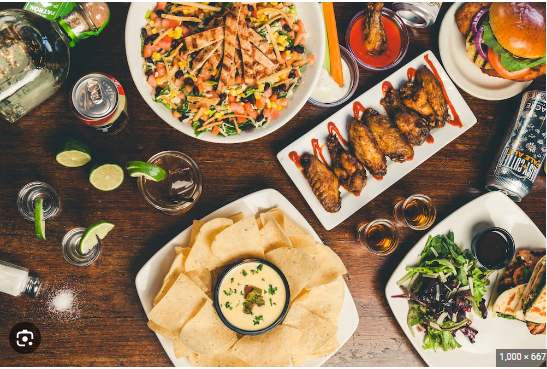

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
df= pd.read_csv('Dataset.csv')


In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Checking the size of dataset

In [5]:
df.shape

(9551, 21)

# Dropping the Irrelevant columns

In [6]:
df=df.drop(['Restaurant ID'],axis=1)
df=df.drop(['Locality Verbose'],axis=1)



In [7]:
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Checking & Handling the missing values & datatypes

In [8]:
df.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Longitude             9551 non-null   float64
 6   Latitude              9551 non-null   float64
 7   Cuisines              9542 non-null   object 
 8   Average Cost for two  9551 non-null   int64  
 9   Currency              9551 non-null   object 
 10  Has Table booking     9551 non-null   object 
 11  Has Online delivery   9551 non-null   object 
 12  Is delivering now     9551 non-null   object 
 13  Switch to order menu  9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

📊 Observation

The dataset contains some null values in the Cuisines column. 
There are a total of 13 categorical variables in the dataset.


# checking the null values

In [10]:
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.dropna(inplace=True)
# Removing null values

In [13]:
df.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [14]:
df.corr()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Country Code,1.000000,-0.694629,0.018049,0.043717,0.245363,0.281295,0.154361
Longitude,-0.694629,1.000000,0.045415,0.045948,-0.080257,-0.114733,-0.084371
Latitude,0.018049,0.045415,1.000000,-0.111080,-0.166735,0.000197,-0.022914
Average Cost for two,0.043717,0.045948,-0.111080,1.000000,0.075111,0.051864,0.067833
Price range,0.245363,-0.080257,-0.166735,0.075111,1.000000,0.438356,0.309474
Aggregate rating,0.281295,-0.114733,0.000197,0.051864,0.438356,1.000000,0.313474
Votes,0.154361,-0.084371,-0.022914,0.067833,0.309474,0.313474,1.000000


In [15]:
df.nunique()

Restaurant Name         7437
Country Code              15
City                     140
Address                 8910
Locality                1206
Longitude               8111
Latitude                8668
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

# Data visualization

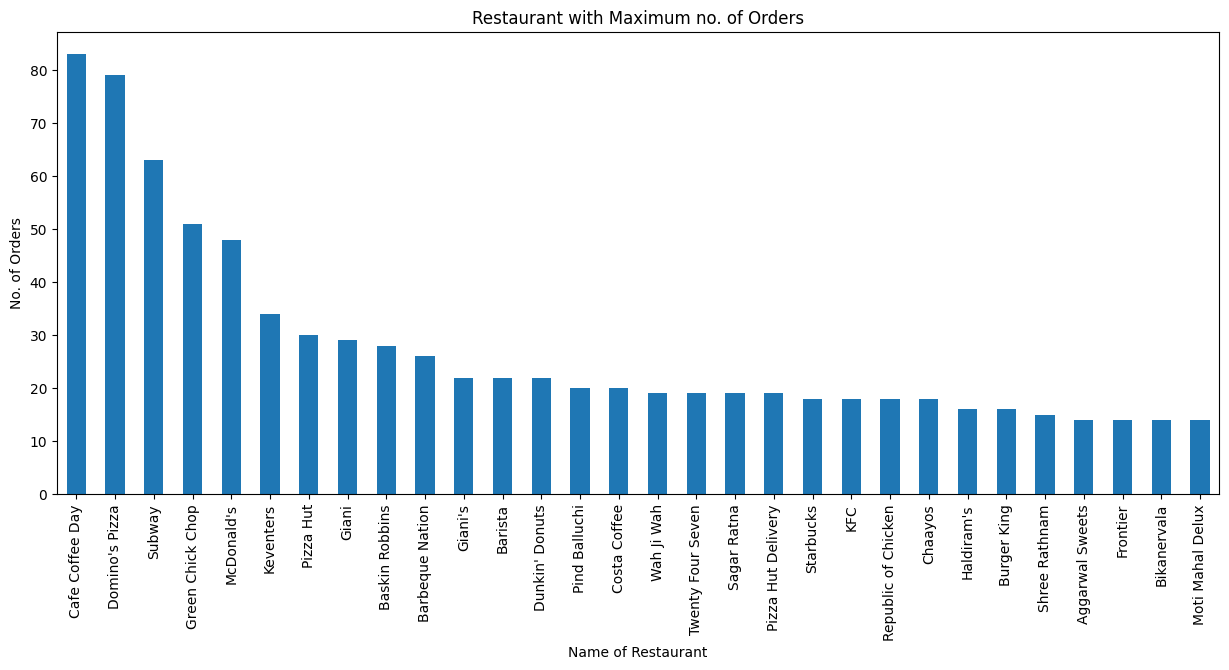

In [16]:
plt.figure(figsize=(15,6))
data=(df["Restaurant Name"].value_counts()[:30])
data.plot(kind="bar")
plt.xlabel("Name of Restaurant")
plt.ylabel("No. of Orders")
plt.title("Restaurant with Maximum no. of Orders")


plt.xticks(rotation=90)
plt.show()

## 📊 UNIVARIANT ANALYSIS 

## 📊 Count Plot

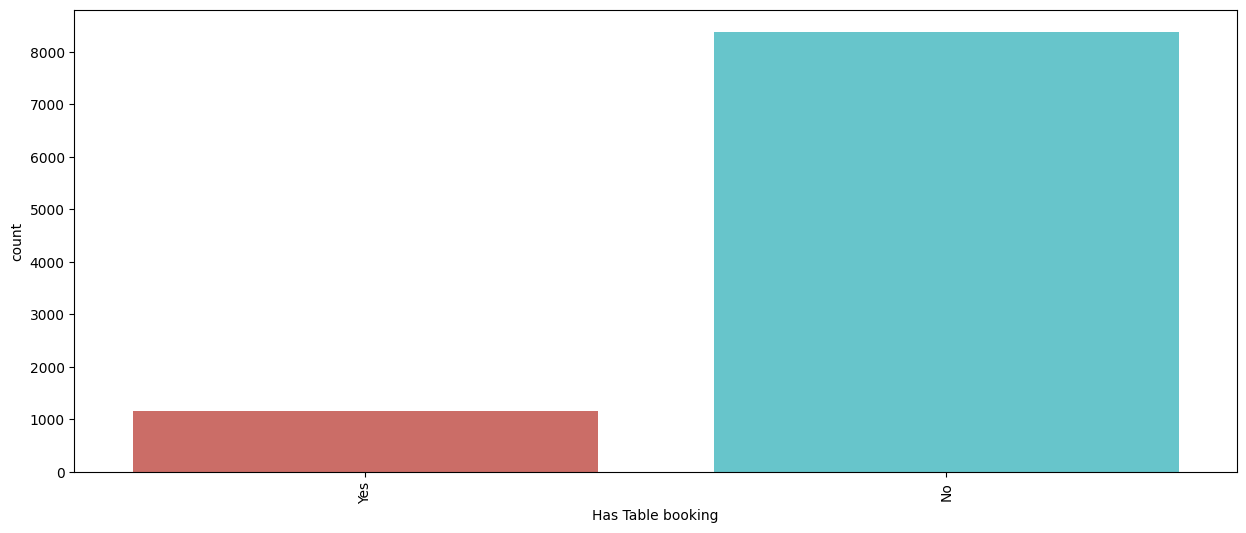

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Has Table booking'], data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

📊 Observation

Most of the cutomers has no booking. 



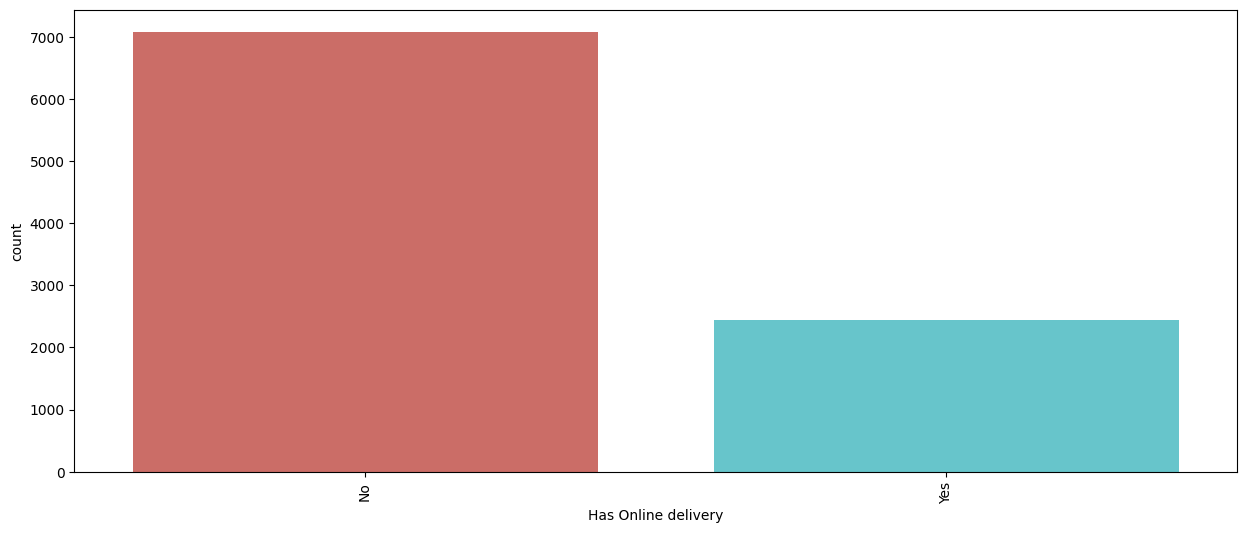

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Has Online delivery'], data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

# Observation
some of the customers have online booking

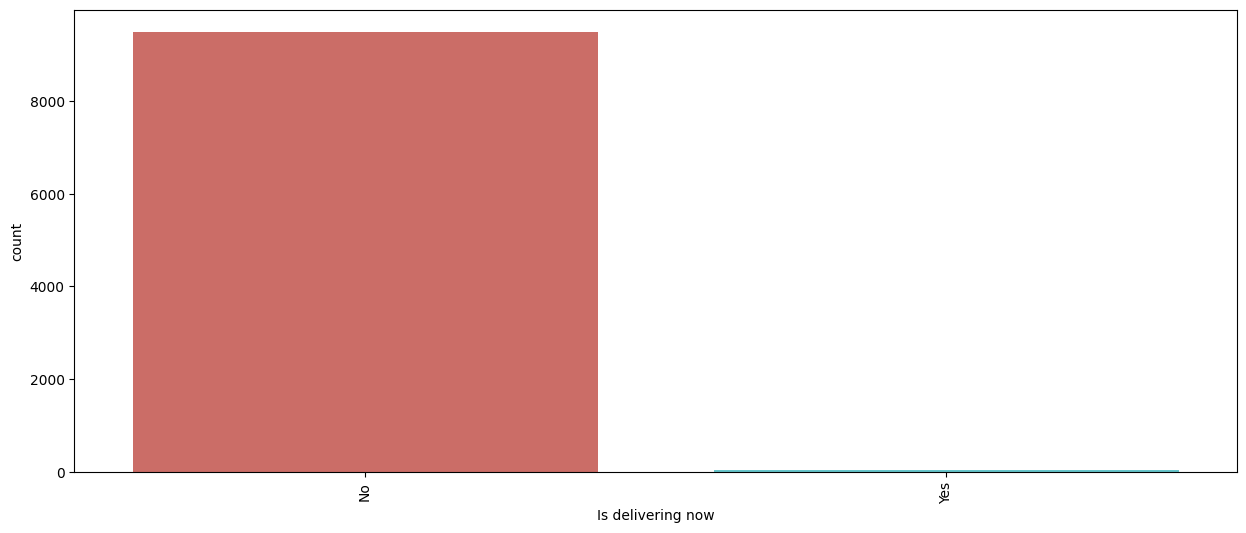

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Is delivering now'], data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

## Observation
Very less deliveries.

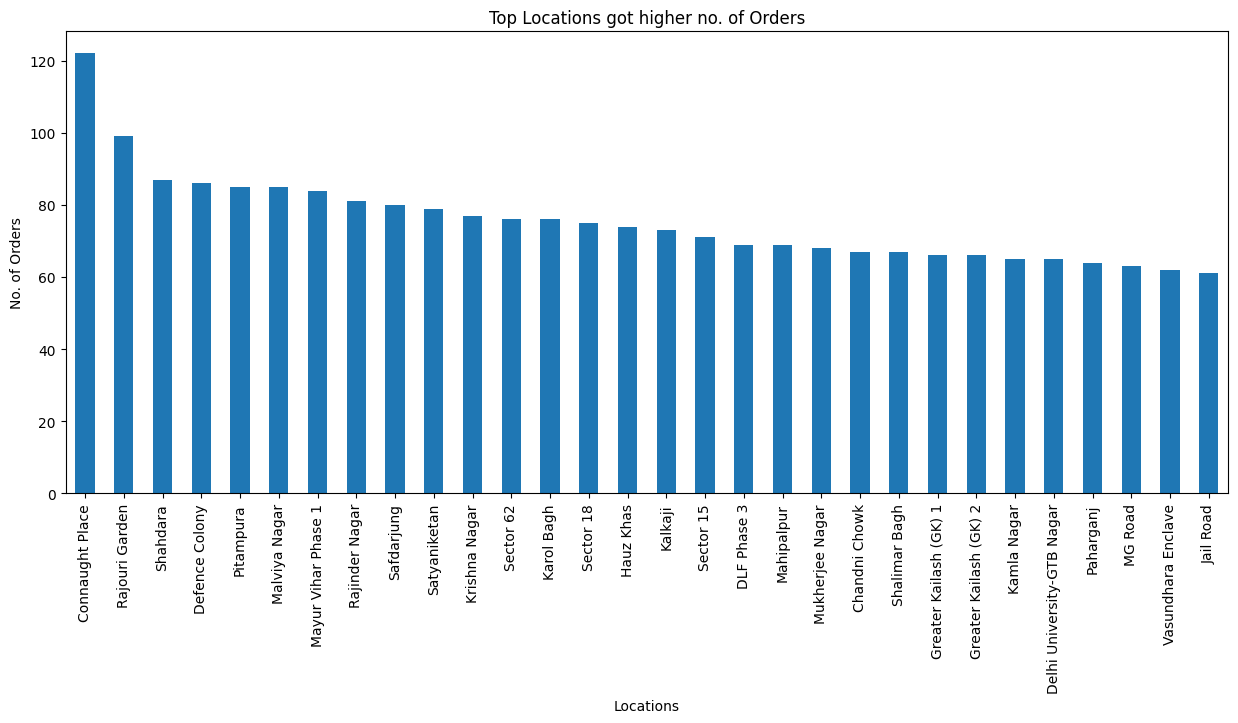

In [20]:
plt.figure(figsize=(15,6))
data=(df["Locality"].value_counts()[:30])
data.plot(kind="bar")
plt.xlabel("Locations")
plt.ylabel("No. of Orders")
plt.title("Top Locations got higher no. of Orders")


plt.xticks(rotation=90)
plt.show()

## Observation

Maximum no. of Orders are from Connaught place.

In [21]:
df["Aggregate rating"].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

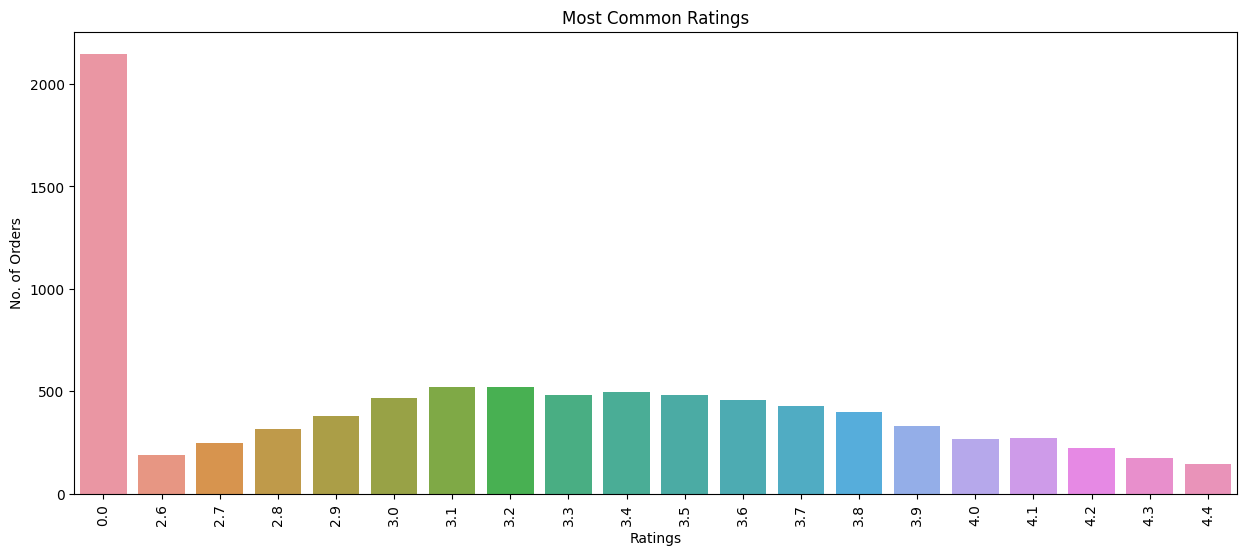

In [22]:
plt.figure(figsize=(15,6))
data=(df["Aggregate rating"].value_counts().reset_index()[:20])
sns.barplot(x=data['index'],y=data['Aggregate rating'])
plt.xlabel("Ratings")
plt.ylabel("No. of Orders")
plt.title("Most Common Ratings")


plt.xticks(rotation=90)
plt.show()

# 📊 Observation
Note that maximum no. of costumers given 0 ratings

In [23]:
df["Average Cost for two"].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

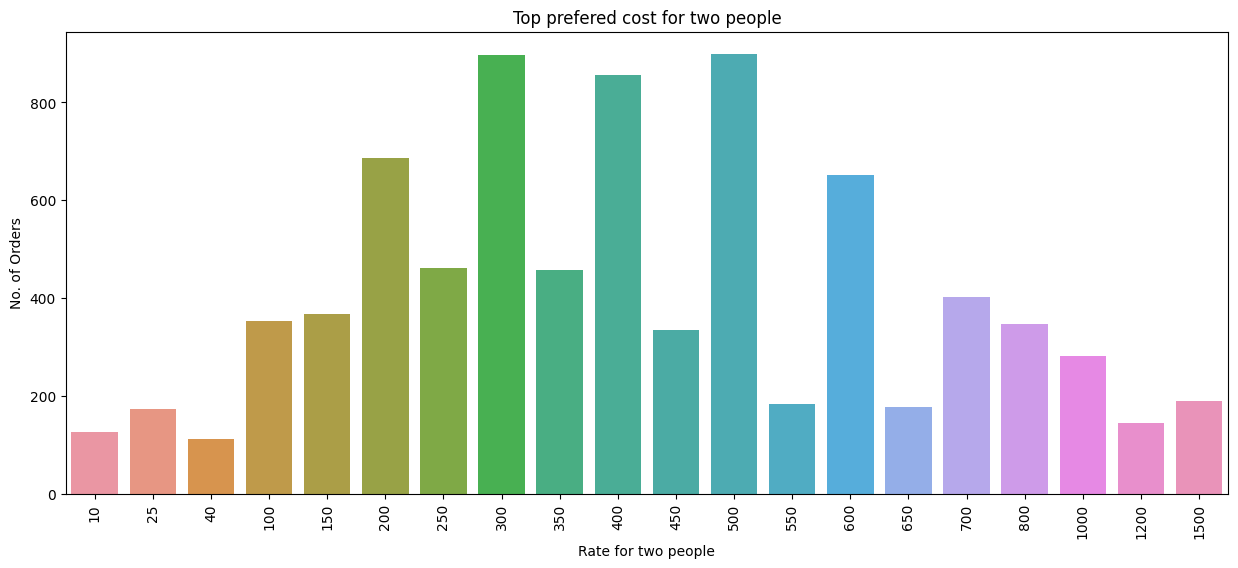

In [24]:
plt.figure(figsize=(15,6))
data=(df["Average Cost for two"].value_counts().reset_index()[:20])
sns.barplot(x=data['index'],y=data["Average Cost for two"])
plt.xlabel("Rate for two people")
plt.ylabel("No. of Orders")
plt.title("Top prefered cost for two people")


plt.xticks(rotation=90)
plt.show()

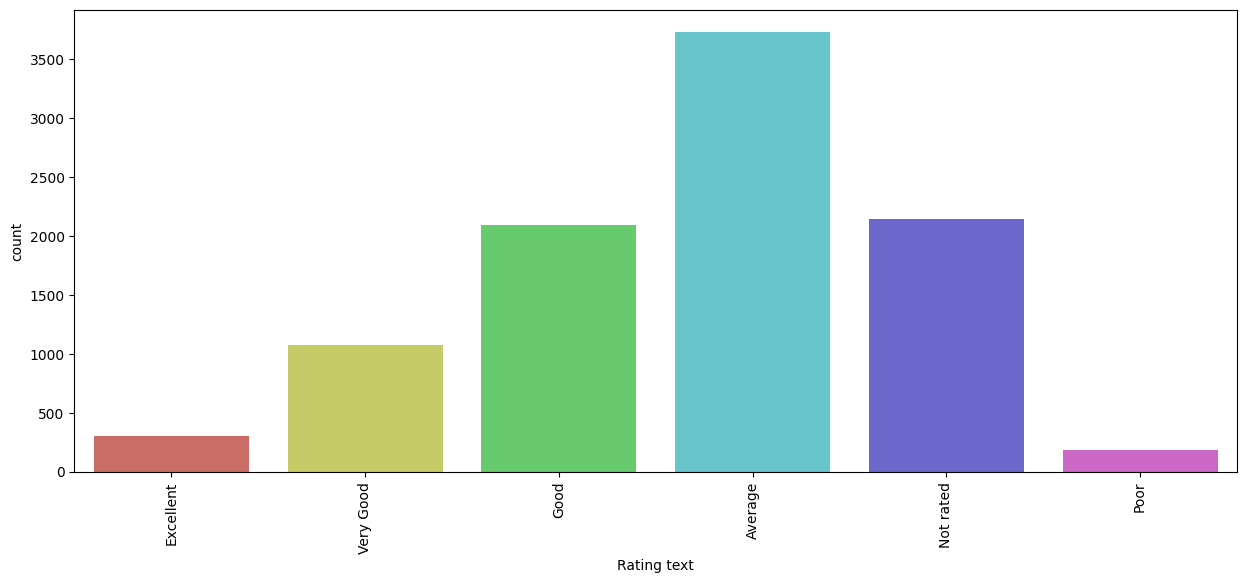

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Rating text'], data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

# 📊 Observation
Note that most of the customer has given Average Rating.

# Pie Chart 🎯


<Axes: ylabel='Price range'>

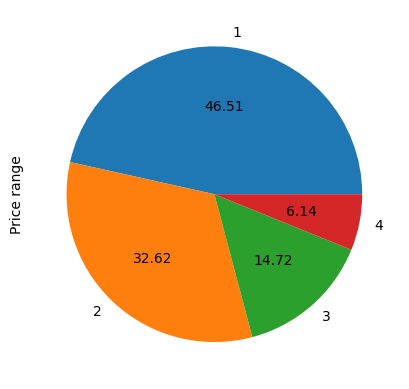

In [26]:
# Percentage count of Price range
df['Price range'].value_counts().plot(kind='pie', autopct = '%.2f')

### 📊 Observation
Most of the costumers belongs to Price Range 1

<Axes: ylabel='Aggregate rating'>

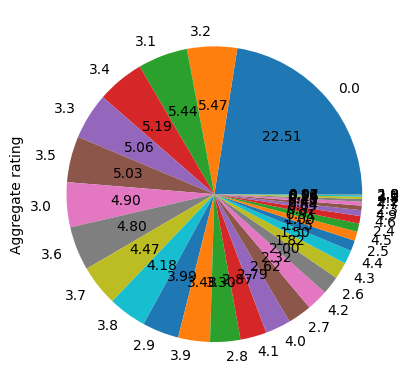

In [27]:
# Percentage Count of Ratings

df['Aggregate rating'].value_counts().plot(kind='pie', autopct = '%.2f')

### 📊 Observation
Note that 22.51% costumers given 0 ratings

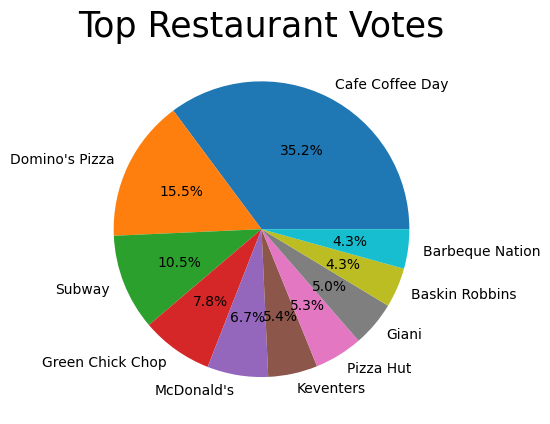

In [28]:
plt.pie(df["Votes"].value_counts()[:10],labels=df["Restaurant Name"].value_counts().index[:10],autopct="%0.1f%%", textprops={"fontsize":10})
plt.title('Top Restaurant Votes',size=25)
plt.show()


### 📊 Observation
Note that 35.21% costumers given the votes to cafe coffee day.

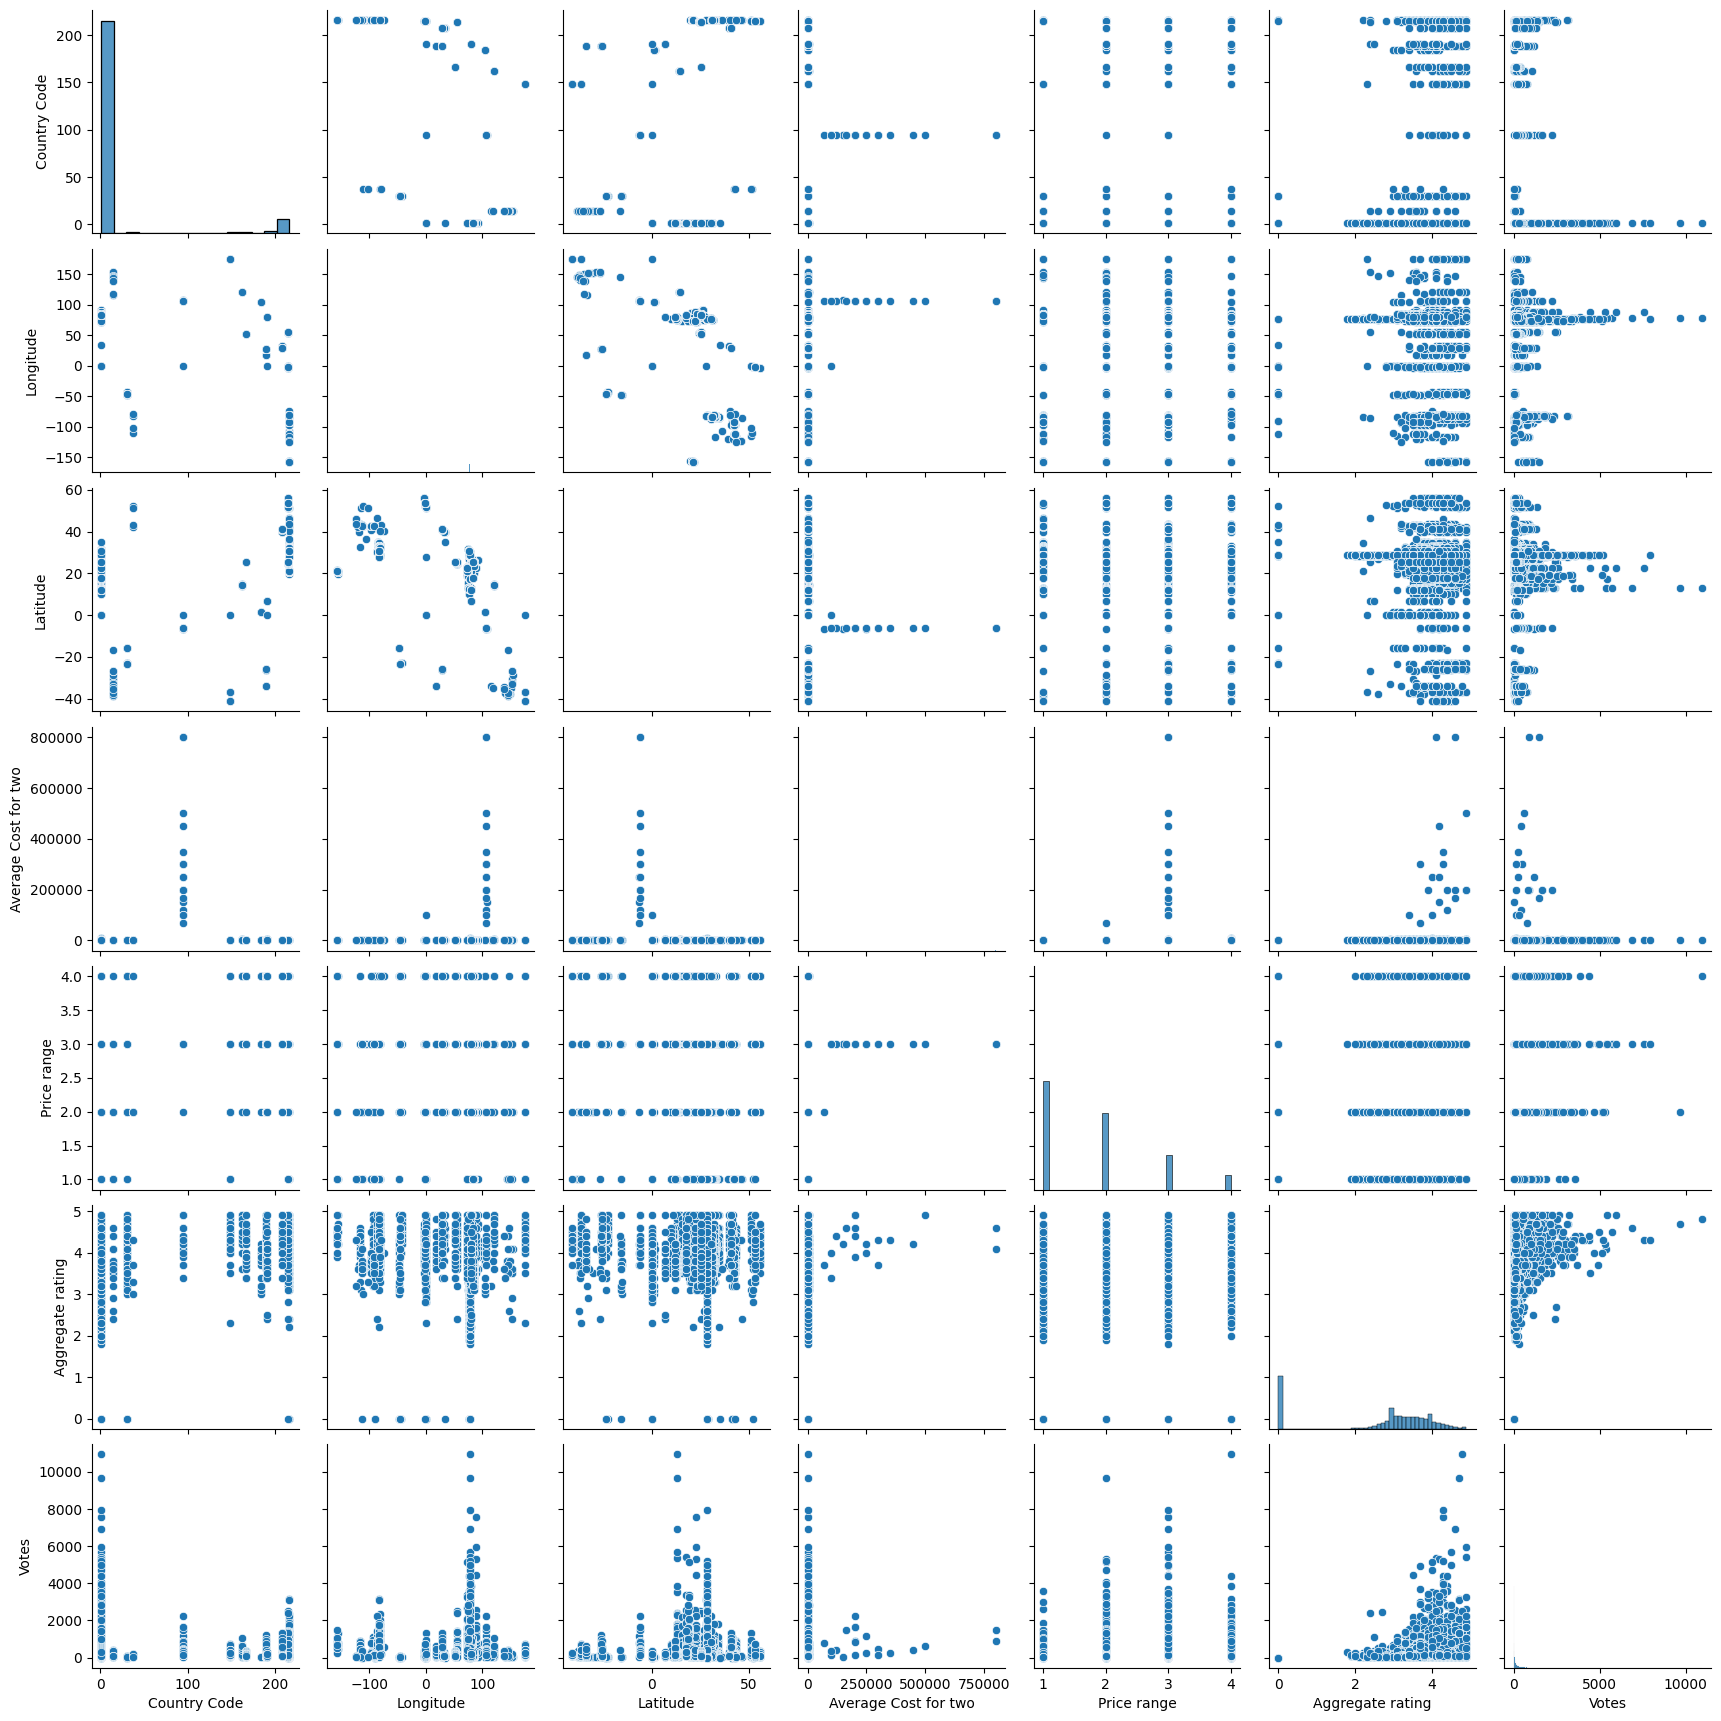

In [29]:
sns.pairplot(df)

### Dropping the unneccessry columns

In [30]:
df=df.drop(['Restaurant Name'],axis=1)
df=df.drop(['Country Code'],axis=1)
df=df.drop(['Address'],axis=1)





In [31]:
df.head()

,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = le.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = le.fit_transform(df['Switch to order menu'])
df['Rating text'] = le.fit_transform(df['Rating text'])
df['Cuisines'] = le.fit_transform(df['Cuisines'])
df['Currency'] = le.fit_transform(df['Currency'])
df['Locality'] = le.fit_transform(df['Locality'])
df['Rating color'] = le.fit_transform(df['Rating color'])
df['City'] = le.fit_transform(df['City'])



In [34]:
df.head()

,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,73,171,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314
1,73,592,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591
2,75,308,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270
3,75,860,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365
4,75,860,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229


In [35]:
df_corr=df.corr()
df_corr

,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
City,1.000000,0.094835,0.114510,-0.004607,0.026584,-0.028306,-0.074380,-0.004039,0.011926,-0.014005,NaN,-0.104848,-0.130848,0.111089,-0.099135,-0.078513
Locality,0.094835,1.000000,0.085265,-0.020195,0.007257,-0.012167,0.022733,-0.065775,-0.031276,-0.007338,NaN,-0.115023,-0.174248,0.037044,-0.037768,-0.124193
Longitude,0.114510,0.085265,1.000000,0.045415,0.129325,0.045948,0.332637,0.099860,0.177922,0.018703,NaN,-0.080257,-0.114733,0.060153,-0.183417,-0.084371
Latitude,-0.004607,-0.020195,0.045415,1.000000,0.037841,-0.111080,-0.100965,0.054874,0.119087,0.015037,NaN,-0.166735,0.000197,0.042406,-0.129332,-0.022914
Cuisines,0.026584,0.007257,0.129325,0.037841,1.000000,0.005875,0.070336,0.050867,-0.016303,0.007809,NaN,-0.005265,-0.080832,-0.016261,-0.079944,-0.032935
Average Cost for two,-0.028306,-0.012167,0.045948,-0.111080,0.005875,1.000000,0.045566,0.007733,-0.019017,-0.001866,NaN,0.075111,0.051864,-0.050005,0.031440,0.067833
Currency,-0.074380,0.022733,0.332637,-0.100965,0.070336,0.045566,1.000000,-0.000118,0.005806,0.001339,NaN,0.075073,-0.005337,-0.040485,0.014355,-0.026488
Has Table booking,-0.004039,-0.065775,0.099860,0.054874,0.050867,0.007733,-0.000118,1.000000,0.101041,-0.016838,NaN,0.502166,0.190351,-0.021371,0.044014,0.169619
Has Online delivery,0.011926,-0.031276,0.177922,0.119087,-0.016303,-0.019017,0.005806,0.101041,1.000000,0.101713,NaN,0.077887,0.226250,0.011505,-0.081057,0.074532
Is delivering now,-0.014005,-0.007338,0.018703,0.015037,0.007809,-0.001866,0.001339,-0.016838,0.101713,1.000000,NaN,0.010937,0.019231,0.001889,-0.031989,-0.001105


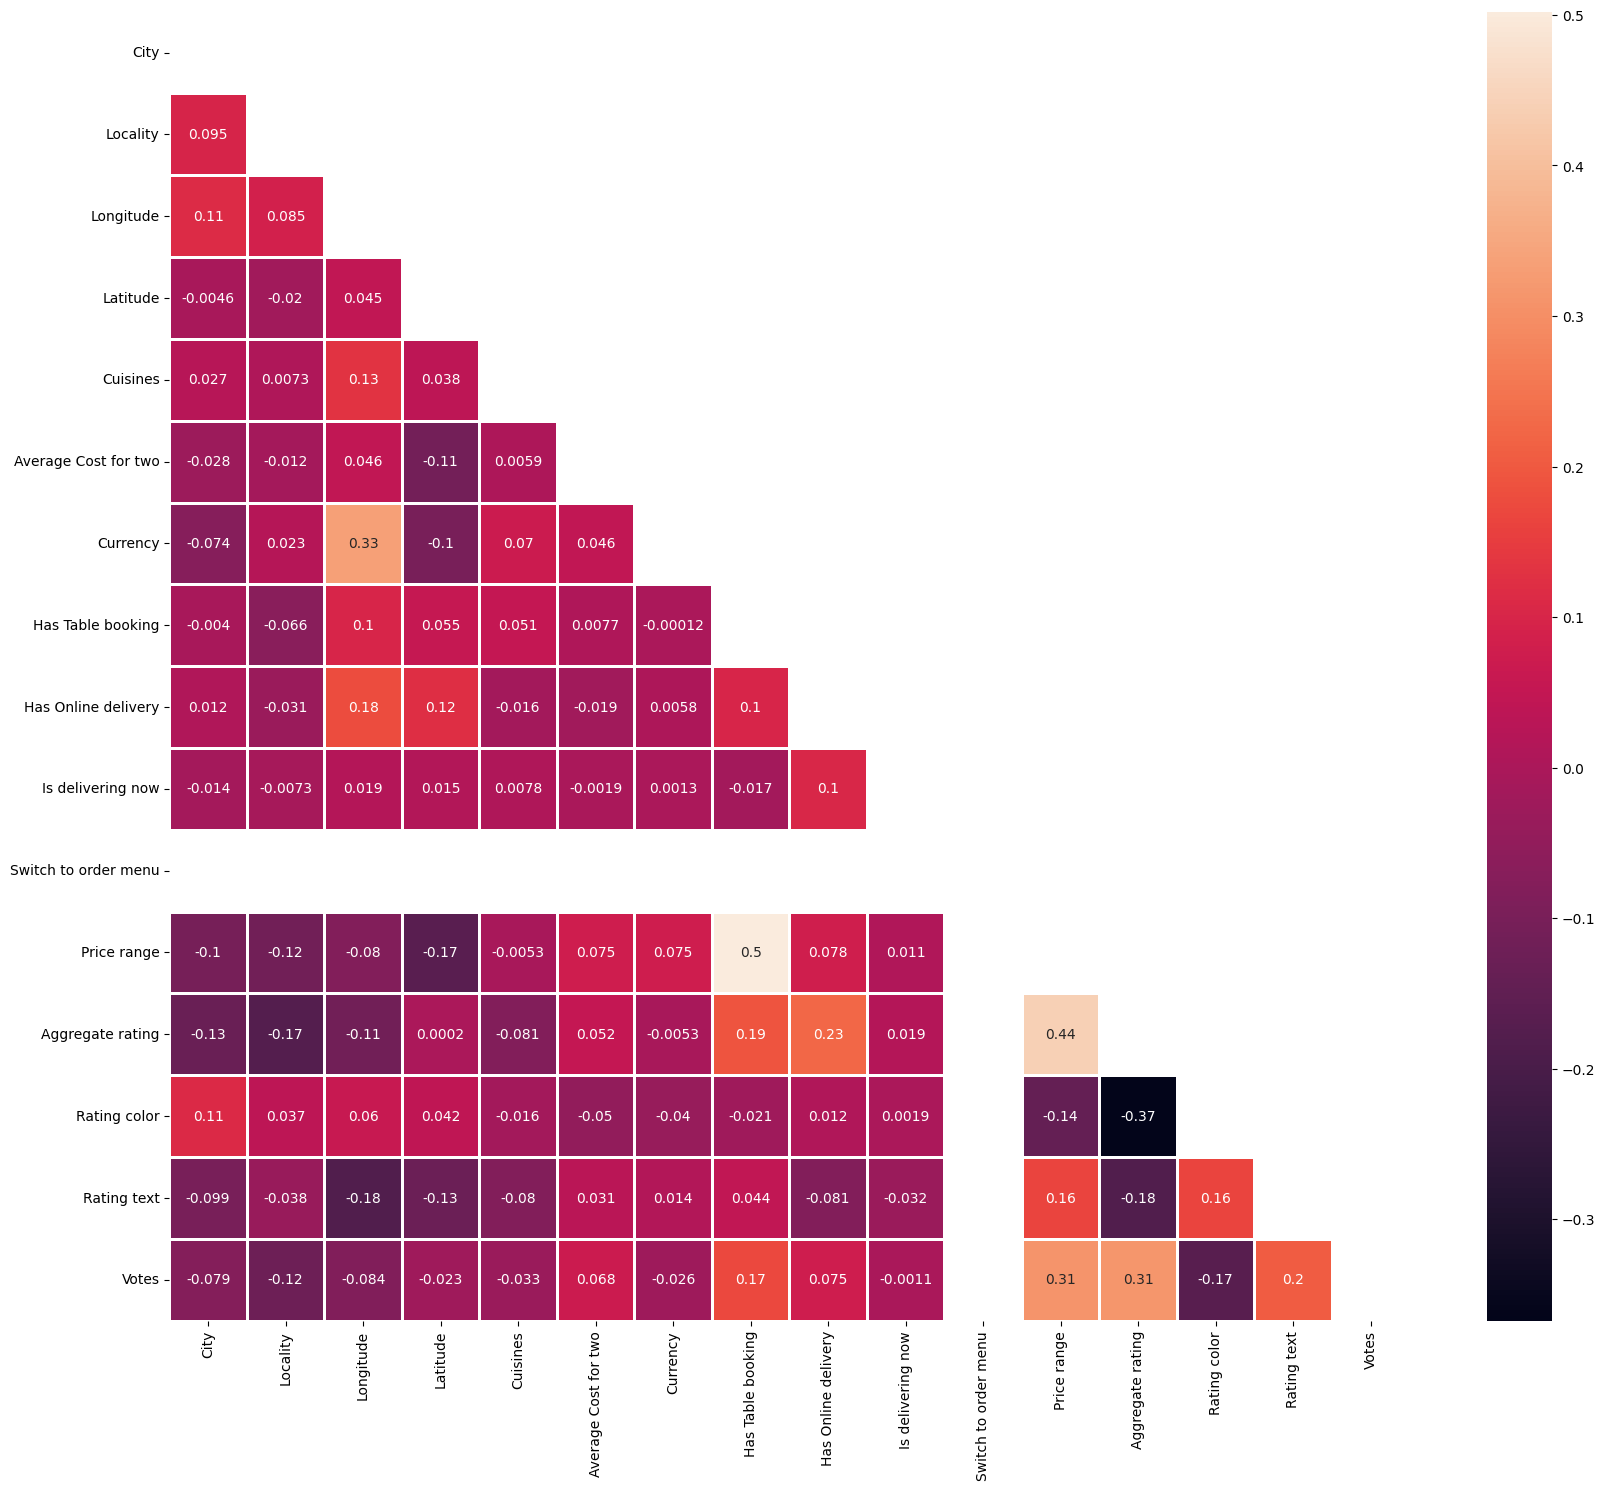

In [36]:
plt.figure(figsize=(20,17))
matrix=np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap='rocket');
plt.show()

In [37]:
df_corr=df.corr()

In [38]:
df_corr

,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
City,1.000000,0.094835,0.114510,-0.004607,0.026584,-0.028306,-0.074380,-0.004039,0.011926,-0.014005,NaN,-0.104848,-0.130848,0.111089,-0.099135,-0.078513
Locality,0.094835,1.000000,0.085265,-0.020195,0.007257,-0.012167,0.022733,-0.065775,-0.031276,-0.007338,NaN,-0.115023,-0.174248,0.037044,-0.037768,-0.124193
Longitude,0.114510,0.085265,1.000000,0.045415,0.129325,0.045948,0.332637,0.099860,0.177922,0.018703,NaN,-0.080257,-0.114733,0.060153,-0.183417,-0.084371
Latitude,-0.004607,-0.020195,0.045415,1.000000,0.037841,-0.111080,-0.100965,0.054874,0.119087,0.015037,NaN,-0.166735,0.000197,0.042406,-0.129332,-0.022914
Cuisines,0.026584,0.007257,0.129325,0.037841,1.000000,0.005875,0.070336,0.050867,-0.016303,0.007809,NaN,-0.005265,-0.080832,-0.016261,-0.079944,-0.032935
Average Cost for two,-0.028306,-0.012167,0.045948,-0.111080,0.005875,1.000000,0.045566,0.007733,-0.019017,-0.001866,NaN,0.075111,0.051864,-0.050005,0.031440,0.067833
Currency,-0.074380,0.022733,0.332637,-0.100965,0.070336,0.045566,1.000000,-0.000118,0.005806,0.001339,NaN,0.075073,-0.005337,-0.040485,0.014355,-0.026488
Has Table booking,-0.004039,-0.065775,0.099860,0.054874,0.050867,0.007733,-0.000118,1.000000,0.101041,-0.016838,NaN,0.502166,0.190351,-0.021371,0.044014,0.169619
Has Online delivery,0.011926,-0.031276,0.177922,0.119087,-0.016303,-0.019017,0.005806,0.101041,1.000000,0.101713,NaN,0.077887,0.226250,0.011505,-0.081057,0.074532
Is delivering now,-0.014005,-0.007338,0.018703,0.015037,0.007809,-0.001866,0.001339,-0.016838,0.101713,1.000000,NaN,0.010937,0.019231,0.001889,-0.031989,-0.001105


In [39]:
df

,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,73,171,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314
1,73,592,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591
2,75,308,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270
3,75,860,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365
4,75,860,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,139,516,28.977392,41.022793,1813,80,11,0,0,0,0,3,4.1,1,5,788
9547,139,551,29.041297,41.009847,1824,105,11,0,0,0,0,3,4.2,1,5,1034
9548,139,553,29.034640,41.055817,1110,170,11,0,0,0,0,4,3.7,5,2,661
9549,139,553,29.036019,41.057979,1657,120,11,0,0,0,0,4,4.0,1,5,901


In [40]:
x=df.drop('Aggregate rating',axis=1)
y=df['Aggregate rating']

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20)

In [44]:
x_train.head()

,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
3279,87,278,77.206386,28.698453,331,450,4,0,0,0,0,1,2,0,46
5630,87,686,77.170769,28.558634,58,500,4,0,1,0,0,2,2,0,78
6149,87,758,77.212529,28.627898,1699,300,4,0,0,0,0,1,4,3,1
2138,50,1029,77.076278,28.451342,1645,800,4,0,0,0,0,2,4,3,1
2345,58,204,75.783013,26.910262,1273,1500,4,0,0,0,0,3,5,2,67


In [45]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [46]:
scaler.data_min_

array([   0.      ,    0.      , -157.836031,  -41.330428,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    1.      ,    0.      ,    0.      ,    0.      ])

In [47]:
scaler.data_max_

array([1.39000000e+02, 1.20400000e+03, 1.74793257e+02, 5.59766440e+01,
       1.82400000e+03, 8.00000000e+05, 1.10000000e+01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+00,
       5.00000000e+00, 5.00000000e+00, 9.66700000e+03])

In [87]:
x_train=scaler.fit_transform(x_train)

In [89]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.625899,0.230897,0.706620,0.719669,0.181469,0.000563,0.363636,0.0,0.0,0.0,0.0,0.000000,0.4,0.0,0.004758
1,0.625899,0.569767,0.706513,0.718232,0.031798,0.000625,0.363636,0.0,1.0,0.0,0.0,0.333333,0.4,0.0,0.008069
2,0.625899,0.629568,0.706638,0.718944,0.931469,0.000375,0.363636,0.0,0.0,0.0,0.0,0.000000,0.8,0.6,0.000103
3,0.359712,0.854651,0.706229,0.717129,0.901864,0.001000,0.363636,0.0,0.0,0.0,0.0,0.333333,0.8,0.6,0.000103
4,0.417266,0.169435,0.702341,0.701292,0.697917,0.001875,0.363636,0.0,0.0,0.0,0.0,0.666667,1.0,0.4,0.006931


In [90]:
x_test=scaler.fit_transform(x_test)

In [ ]:
pd.DataFrame(x_train).head()

In [49]:
scaler.feature_range

(0, 1)

In [50]:
scaler.fit_transform(x_train)

array([[6.25899281e-01, 2.30897010e-01, 7.06619727e-01, ...,
        4.00000000e-01, 0.00000000e+00, 4.75845660e-03],
       [6.25899281e-01, 5.69767442e-01, 7.06512652e-01, ...,
        4.00000000e-01, 0.00000000e+00, 8.06868729e-03],
       [6.25899281e-01, 6.29568106e-01, 7.06638196e-01, ...,
        8.00000000e-01, 6.00000000e-01, 1.03444709e-04],
       ...,
       [6.25899281e-01, 9.09468439e-01, 7.06258807e-01, ...,
        8.00000000e-01, 6.00000000e-01, 1.03444709e-04],
       [3.88489209e-01, 5.14950166e-01, 7.10165709e-01, ...,
        1.00000000e+00, 4.00000000e-01, 6.37219406e-02],
       [6.25899281e-01, 6.41196013e-01, 7.06276881e-01, ...,
        4.00000000e-01, 0.00000000e+00, 1.65511534e-03]])

In [51]:
x_train_scaled = scaler.transform(x_train)

In [52]:
print(x_train_scaled)


[[6.25899281e-01 2.30897010e-01 7.06619727e-01 ... 4.00000000e-01
  0.00000000e+00 4.75845660e-03]
 [6.25899281e-01 5.69767442e-01 7.06512652e-01 ... 4.00000000e-01
  0.00000000e+00 8.06868729e-03]
 [6.25899281e-01 6.29568106e-01 7.06638196e-01 ... 8.00000000e-01
  6.00000000e-01 1.03444709e-04]
 ...
 [6.25899281e-01 9.09468439e-01 7.06258807e-01 ... 8.00000000e-01
  6.00000000e-01 1.03444709e-04]
 [3.88489209e-01 5.14950166e-01 7.10165709e-01 ... 1.00000000e+00
  4.00000000e-01 6.37219406e-02]
 [6.25899281e-01 6.41196013e-01 7.06276881e-01 ... 4.00000000e-01
  0.00000000e+00 1.65511534e-03]]


pd.DataFrame(x_train).head()

In [53]:
scaler=MinMaxScaler()

In [54]:
print(scaler)

MinMaxScaler()


In [55]:
scaler.fit(x_test)

MinMaxScaler()

In [56]:
scaler.data_min_

array([   0.        ,    0.        , -157.948486  ,  -41.29483333,
          1.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    1.        ,
          0.        ,    0.        ,    0.        ])

In [57]:
scaler.data_max_

array([1.39000000e+02, 1.20500000e+03, 1.74832089e+02, 5.59769800e+01,
       1.81800000e+03, 3.50000000e+05, 1.10000000e+01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+00,
       5.00000000e+00, 5.00000000e+00, 1.09340000e+04])

In [58]:
scaler.feature_range

(0, 1)

In [59]:
x_test.describe()


,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
count,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.0,1909.000000,1909.000000,1909.000000,1909.000000
mean,77.613934,654.910424,63.752775,25.563786,971.514405,1012.228392,3.993190,0.129387,0.239392,0.005762,0.0,1.811420,2.950760,1.775799,151.554741
std,22.660914,311.777076,41.819723,11.515217,515.661234,9680.673880,0.974225,0.335716,0.426824,0.075710,0.0,0.916913,1.488842,1.682011,433.709572
min,0.000000,0.000000,-157.948486,-41.294833,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
25%,74.000000,379.000000,77.079511,28.475776,497.000000,250.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.000000,0.000000,4.000000
50%,87.000000,695.000000,77.194529,28.570469,1065.000000,400.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.000000,2.000000,27.000000
75%,87.000000,916.000000,77.284315,28.642506,1342.000000,700.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,4.000000,3.000000,137.000000
max,139.000000,1205.000000,174.832089,55.976980,1818.000000,350000.000000,11.000000,1.000000,1.000000,1.000000,0.0,4.000000,5.000000,5.000000,10934.000000


In [60]:
scaler.transform(x_test)

array([[6.25899281e-01, 4.40663900e-01, 7.06700377e-01, ...,
        4.00000000e-01, 0.00000000e+00, 2.21327968e-02],
       [6.25899281e-01, 8.04149378e-01, 7.06872936e-01, ...,
        8.00000000e-01, 6.00000000e-01, 2.74373514e-04],
       [6.25899281e-01, 6.29045643e-01, 7.06871830e-01, ...,
        8.00000000e-01, 6.00000000e-01, 0.00000000e+00],
       ...,
       [3.59712230e-01, 3.58506224e-01, 7.06131104e-01, ...,
        4.00000000e-01, 0.00000000e+00, 5.48747028e-04],
       [3.59712230e-01, 7.84232365e-01, 7.06316271e-01, ...,
        8.00000000e-01, 6.00000000e-01, 0.00000000e+00],
       [6.25899281e-01, 3.12863071e-01, 7.06737583e-01, ...,
        1.00000000e+00, 4.00000000e-01, 3.29248217e-03]])

In [61]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[6.25899281e-01, 4.40663900e-01, 7.06700377e-01, ...,
        4.00000000e-01, 0.00000000e+00, 2.21327968e-02],
       [6.25899281e-01, 8.04149378e-01, 7.06872936e-01, ...,
        8.00000000e-01, 6.00000000e-01, 2.74373514e-04],
       [6.25899281e-01, 6.29045643e-01, 7.06871830e-01, ...,
        8.00000000e-01, 6.00000000e-01, 0.00000000e+00],
       ...,
       [3.59712230e-01, 3.58506224e-01, 7.06131104e-01, ...,
        4.00000000e-01, 0.00000000e+00, 5.48747028e-04],
       [3.59712230e-01, 7.84232365e-01, 7.06316271e-01, ...,
        8.00000000e-01, 6.00000000e-01, 0.00000000e+00],
       [6.25899281e-01, 3.12863071e-01, 7.06737583e-01, ...,
        1.00000000e+00, 4.00000000e-01, 3.29248217e-03]])

In [62]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
reg=LinearRegression()

In [65]:
reg.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred=reg.predict(x_test)

In [67]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Error: {r2}")

Mean Squared Error: 1.3110245424212976
R-Squared Error: 0.44065272857638715


In [68]:
reg.score(x_test,y_test)

0.44065272857638715

In [69]:
reg.score(x_train,y_train)

0.42594803509878454

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
tree_reg=DecisionTreeRegressor()

In [72]:
tree_reg

DecisionTreeRegressor()

In [73]:
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [74]:
y_pred=tree_reg.predict(x_test)

In [75]:
y_pred

array([3.4, 0. , 0. , ..., 2.5, 0. , 3.6])

In [76]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Error: {r2}")

Mean Squared Error: 0.05402828706128863
R-Squared Error: 0.9769488869433292


In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf_reg= RandomForestRegressor()

In [79]:
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [80]:
y_pred=rf_reg.predict(x_test)

In [81]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Error: {r2}")

Mean Squared Error: 0.0303447616553169
R-Squared Error: 0.987053438677392


In [82]:
import xgboost as xgb

In [83]:
xgb_reg = xgb.XGBRegressor()

In [84]:
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [85]:
y_pred=xgb_reg.predict(x_test)

In [86]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Error: {r2}")

Mean Squared Error: 0.03190040283443813
R-Squared Error: 0.9863897259697347
